In [28]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import random
from scipy.stats import skew, kurtosis, variation, moment
import scipy.integrate as integrate
from math import sqrt, exp, pi
import math

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
    def __str__(self):
        return self._repr_html_()

def average(arr):
    res = 0
    for i in arr:
        res += i
    return res / len(arr)

def std_sqrt_deviation(arr):
    res = 0
    avg = average(arr)
    for i in arr:
        res += (i - avg)**2
    return sqrt(res / len(arr))

In [29]:
#Функция одного выстрела
def shot():
    v = random.uniform(0.0,1.0)
    if v < 0.5:
        return 10
    elif v < 0.8:
        return 5
    else:
        return -1

#Функция, совершающая 3 выстрела и подсчитывающая их результат
def make_shots():
    res = 0
    for i in range(3):
        res += shot()
    return res

#Функция, создающая массив результатов выстрелов
def make_shots_list(n):
    res = []
    for i in range(0, n):
        res.append(make_shots())
    return res

def cdf(shots):
    data = np.cumsum(np.histogram(shots, bins=auto, density=True))
        
k = 10
ns = [10, 100, 1000, 1000000]
shots = make_shots_list(ns[3])

In [30]:
import collections
x_dict = {}
for i in shots:
    if i not in x_dict:
        x_dict[i] = 1
    else:
        x_dict[i] += 1    

x_dict = collections.OrderedDict(sorted(x_dict.items()))
x_table = ListTable()
x_table.append([])
x_table.append([])
n = len(shots)
for i, k in x_dict.items():
    x_table[0].append(i)
    x_table[1].append(k / n)
print("Ряд распределения")
x_table

Ряд распределения


-3,3,8,9,14,15,19,20,25,30
0.0081,0.036045,0.05967,0.053829,0.180571,0.026992,0.150173,0.134814,0.22494,0.124866


Статистическая функция распределения


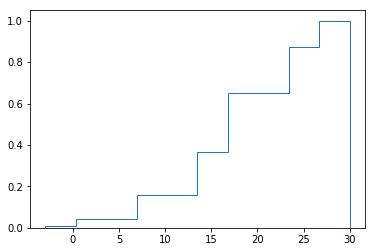

In [31]:
def cdf_plot(shots):
    plt.hist(shots, density=True, cumulative=True, label='CDF', histtype='step', range=(-3, 30))
cdf_plot(shots)
print("Статистическая функция распределения")

In [32]:
E = 18.9
D = 53.8666
k = 10

In [33]:
for i in ns:
    table = ListTable()
    table.append(['E*', 'E', 'delta E', 'D*', 'D', 'delta D'])
    sigmaE = 0
    sigmaD = 0
    for j in range(k):
        shots = make_shots_list(i)
        myE = average(shots)
        myD = np.var(shots)
        table.append([myE, E, E - myE, myD, D, D - myD])
        sigmaE += E - myE
        sigmaD += D - myD
    sigmaE /= k
    sigmaD /= k
    print("n = {}".format(i))
    display(table)
    print("Sigma E: {}".format(sigmaE))
    print("Sigma D: {}".format(sigmaD))      
    

n = 10


E*,E,delta E,D*,D,delta D
20.0,18.9,-1.1000000000000014,49.2,53.8666,4.666599999999995
19.2,18.9,-0.3000000000000007,71.56,53.8666,-17.693400000000004
19.4,18.9,-0.5,59.64000000000001,53.8666,-5.773400000000009
22.2,18.9,-3.3000000000000007,45.96,53.8666,7.906599999999997
17.3,18.9,1.5999999999999979,36.61,53.8666,17.2566
18.6,18.9,0.29999999999999716,43.440000000000005,53.8666,10.426599999999993
19.4,18.9,-0.5,58.44,53.8666,-4.5733999999999995
19.1,18.9,-0.20000000000000284,38.29,53.8666,15.5766
21.2,18.9,-2.3000000000000007,50.35999999999999,53.8666,3.506600000000006
21.8,18.9,-2.900000000000002,33.96,53.8666,19.906599999999997


Sigma E: -0.9200000000000014
Sigma D: 5.120599999999998
n = 100


E*,E,delta E,D*,D,delta D
18.49,18.9,0.41000000000000014,56.349900000000005,53.8666,-2.483300000000007
19.47,18.9,-0.5700000000000003,43.369099999999996,53.8666,10.497500000000002
18.78,18.9,0.11999999999999744,50.5916,53.8666,3.2749999999999986
19.4,18.9,-0.5,55.73999999999999,53.8666,-1.8733999999999895
19.06,18.9,-0.16000000000000014,59.55640000000001,53.8666,-5.689800000000012
20.24,18.9,-1.3399999999999999,40.7824,53.8666,13.084199999999996
18.97,18.9,-0.07000000000000028,38.7691,53.8666,15.097499999999997
17.87,18.9,1.0299999999999976,64.03309999999999,53.8666,-10.166499999999992
18.14,18.9,0.759999999999998,51.5804,53.8666,2.286200000000001
17.18,18.9,1.7199999999999989,53.867599999999996,53.8666,-0.0009999999999976694


Sigma E: 0.13999999999999915
Sigma D: 2.4026399999999994
n = 1000


E*,E,delta E,D*,D,delta D
19.125,18.9,-0.22500000000000142,54.385375,53.8666,-0.5187750000000051
18.727,18.9,0.17299999999999827,50.68847100000001,53.8666,3.1781289999999913
18.717,18.9,0.18299999999999983,54.086911,53.8666,-0.22031100000000237
19.123,18.9,-0.22300000000000253,54.417871000000005,53.8666,-0.551271000000007
18.889,18.9,0.010999999999999233,55.776679,53.8666,-1.9100790000000032
18.622,18.9,0.2779999999999987,54.959115999999995,53.8666,-1.0925159999999963
18.886,18.9,0.013999999999999346,50.589004,53.8666,3.2775959999999955
18.666,18.9,0.2339999999999982,55.550444000000006,53.8666,-1.6838440000000077
19.146,18.9,-0.24600000000000222,53.578683999999996,53.8666,0.2879160000000027
19.023,18.9,-0.12300000000000111,54.208470999999996,53.8666,-0.3418709999999976


Sigma E: 0.00759999999999863
Sigma D: 0.04249739999999704
n = 1000000


E*,E,delta E,D*,D,delta D
18.911534,18.9,-0.011534000000001043,54.077491766844,53.8666,-0.21089176684400002
18.897428,18.9,0.002571999999997132,54.19266298481601,53.8666,-0.32606298481601215
18.893406,18.9,0.006593999999999767,54.02719771916402,53.8666,-0.16059771916402354
18.895745,18.9,0.004254999999997011,54.01224389497501,53.8666,-0.1456438949750094
18.888591,18.9,0.011408999999996894,54.093871034719,53.8666,-0.22727103471900278
18.89074,18.9,0.009259999999997603,53.937884252399996,53.8666,-0.07128425239999814
18.893591,18.9,0.006408999999997889,54.080230124719,53.8666,-0.21363012471900333
18.88524,18.9,0.014759999999998996,54.147704142400016,53.8666,-0.281104142400018
18.901092,18.9,-0.0010919999999998709,53.99687320753601,53.8666,-0.130273207536014
18.895922,18.9,0.004077999999999804,54.000633769916014,53.8666,-0.1340337699160159


Sigma E: 0.004671099999998418
Sigma D: -0.19007928974890972


In [34]:
print("Коэффицент ассиметрии: {}".format(skew(shots)))

Коэффицент ассиметрии: -0.4031155223090719


In [35]:
print("Коэффицент эксцесса: {}".format(kurtosis(shots)))

Коэффицент эксцесса: -0.31328450006332975


Многоугольник распределения


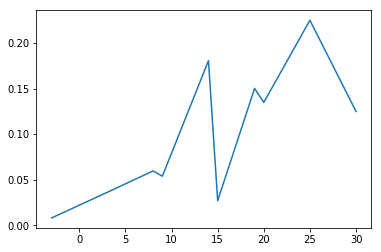

In [36]:
plt.plot(x_table[0], x_table[1]);
print("Многоугольник распределения")

Гистограма распределения


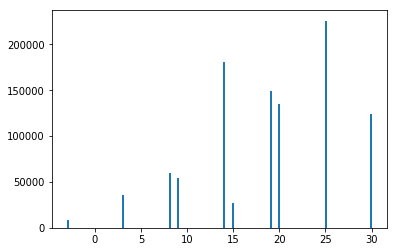

In [37]:
def histogram(shots):
    return plt.hist(shots, bins='auto')

a,b,c = histogram(shots)
print("Гистограма распределения")

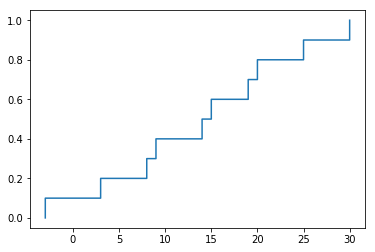

In [38]:
def make_cdf(dict):
    dict_keys_list = list(dict.keys())
    xval = []
    yval = []
    count = 0
    n = len(dict_keys_list)
    epsilon = 0.001
    for i in dict_keys_list:
        xval.append(i-epsilon)
        yval.append(count / n)
        xval.append(i)
        count += 1
        yval.append(count / n)
        
    return xval, yval
        
xval, yval = make_cdf(x_dict)
plt.plot(xval, yval)

In [39]:
def prob(series, k):
    if k < series[0][0]:
        return 0
    elif k > series[0][-1]:
        return 1
    else:
        return series[1][np.searchsorted(series[0], k)]
    
def prob_range(series, k, t):
    return prob(series, t) - prob(series, k)

In [40]:
print("Вероятность попадания в промежуток [2, 7]: {0}".format(prob_range(x_table, 2, 7)))

Вероятность попадания в промежуток [2, 7]: 0.023625


In [41]:
def density(x):
    return 1/sqrt(pi) * exp(-(x**2))

Плотность распределения


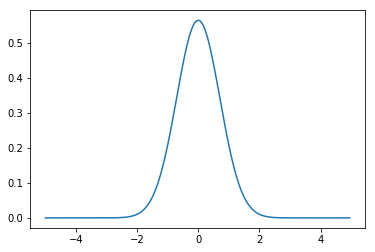

In [42]:
start = -5
step = 0.05
steps = -(start + start) / step
x_axis = list(map(lambda x : start + step * x, range(0, int(steps))))
y_axis = list(map(density, x_axis))
plt.plot(x_axis, y_axis);
print("Плотность распределения")

Функция распределения


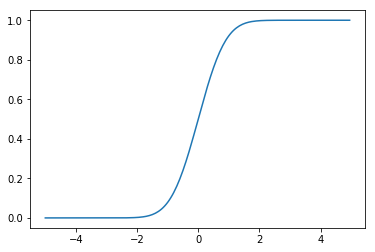

In [43]:
result = list(map(lambda x: integrate.quad(density, -float('inf'), x)[0],x_axis))
plt.plot(x_axis, result);
print("Функция распределения")

In [60]:
k = 100

data = [ random.normalvariate(0, sqrt(1 / pi)) for i in range(0, k)]

print("E: {0}".format(average(data)))
print("D: {0}".format(np.var(data)))
print(skew(data))
print(kurtosis(data))

E: -0.04953676616488993
D: 0.36760962118105395
0.020180803563163728
-0.6840695740072364


Гистограма


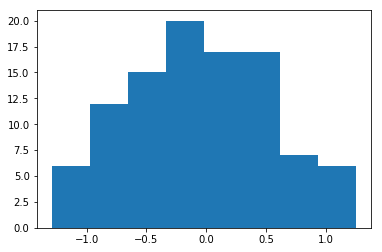

In [61]:
a,b,c = histogram(data);
print("Гистограма")

Статистическая функция распределения


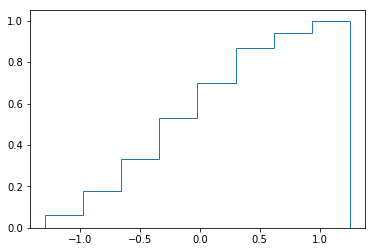

In [62]:
a = plt.hist(data, density=True, cumulative=True, label='CDF', histtype='step', bins='auto')
print("Статистическая функция распределения")

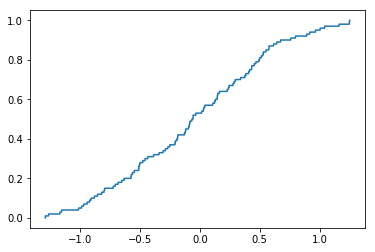

In [64]:
x2_dict = {}
for i in data:
    if i not in x2_dict:
        x2_dict[i] = 1
    else:
        x2_dict[i] += 1    

x2_dict = collections.OrderedDict(sorted(x2_dict.items()))
xval, yval = make_cdf(x2_dict)
plt.plot(xval, yval);